In [84]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


## 1️⃣ Load Dataset (Fashion-MNIST)

In [85]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Training data shape:", train_images.shape)   # (60000, 28, 28)
print("Testing data shape:", test_images.shape)     # (10000, 28, 28)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


## 2️⃣ Visualize Raw Images

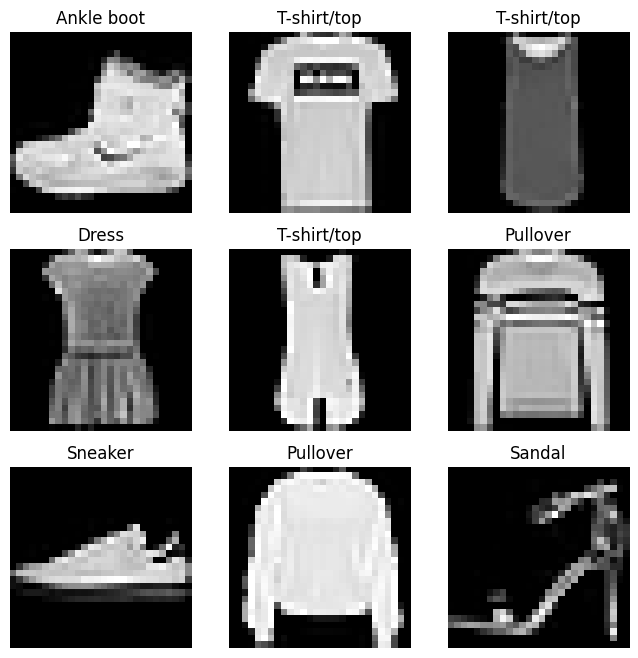

In [86]:

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')        # grayscale
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()


## 3️⃣ Normalize Pixel Values (0–1)

In [87]:

train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

## 4️⃣ Flatten Images for ANN Input (28×28×3 → 784)

In [88]:
train_images = train_images.reshape((train_images.shape[0], -1))  # 28×28 → 784
test_images  = test_images.reshape((test_images.shape[0], -1))

print("New training image shape:", train_images.shape)  # (60000, 784)

New training image shape: (60000, 784)


## 5️⃣ One-Hot Encode the Labels

In [89]:

train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat  = to_categorical(test_labels, 10)

print("Example encoded label:", train_labels_cat[0])

Example encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 6️⃣ Define the ANN Model

In [90]:

model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(784,)),  # 784 inputs
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

## 7️⃣ Compile the Model

In [91]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 8️⃣ Train the ANN

In [92]:

history = model.fit(
    train_images, train_labels_cat,
    epochs=25,
    batch_size=60,
    validation_data=(test_images, test_labels_cat),
    verbose=2
)


Epoch 1/25
1000/1000 - 6s - 6ms/step - accuracy: 0.8214 - loss: 0.4868 - val_accuracy: 0.8473 - val_loss: 0.4233
Epoch 2/25
1000/1000 - 3s - 3ms/step - accuracy: 0.8658 - loss: 0.3647 - val_accuracy: 0.8540 - val_loss: 0.4047
Epoch 3/25
1000/1000 - 3s - 3ms/step - accuracy: 0.8789 - loss: 0.3287 - val_accuracy: 0.8681 - val_loss: 0.3599
Epoch 4/25
1000/1000 - 3s - 3ms/step - accuracy: 0.8855 - loss: 0.3061 - val_accuracy: 0.8763 - val_loss: 0.3589
Epoch 5/25
1000/1000 - 3s - 3ms/step - accuracy: 0.8935 - loss: 0.2863 - val_accuracy: 0.8776 - val_loss: 0.3417
Epoch 6/25
1000/1000 - 3s - 3ms/step - accuracy: 0.8982 - loss: 0.2722 - val_accuracy: 0.8794 - val_loss: 0.3435
Epoch 7/25
1000/1000 - 3s - 3ms/step - accuracy: 0.9034 - loss: 0.2594 - val_accuracy: 0.8863 - val_loss: 0.3235
Epoch 8/25
1000/1000 - 3s - 3ms/step - accuracy: 0.9078 - loss: 0.2457 - val_accuracy: 0.8843 - val_loss: 0.3288
Epoch 9/25
1000/1000 - 3s - 3ms/step - accuracy: 0.9099 - loss: 0.2363 - val_accuracy: 0.8853 - 

## 9️⃣ Evaluate the Model

In [93]:

test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 2s - 5ms/step - accuracy: 0.8921 - loss: 0.4082
Test accuracy: 0.8920999765396118


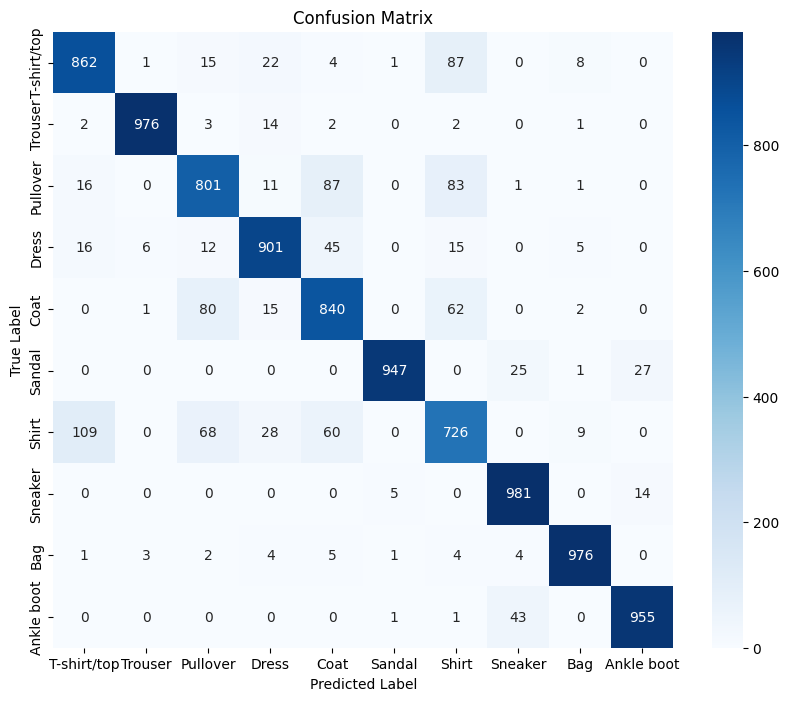

In [94]:

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 🔟 Classification Report


In [95]:


# Generate the classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)

# Print the report
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.81      0.84      0.82      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.74      0.73      0.73      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## **1️⃣1️⃣** Visualize Training Accuracy


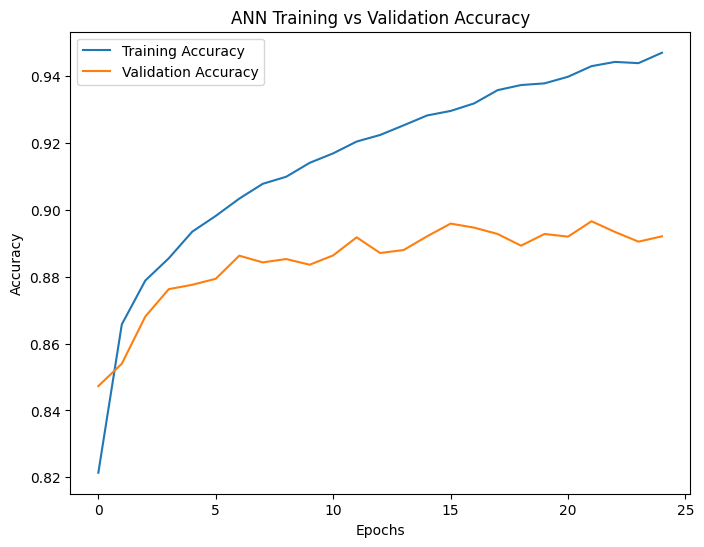

In [96]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 🧩 Visualize Misclassified Images

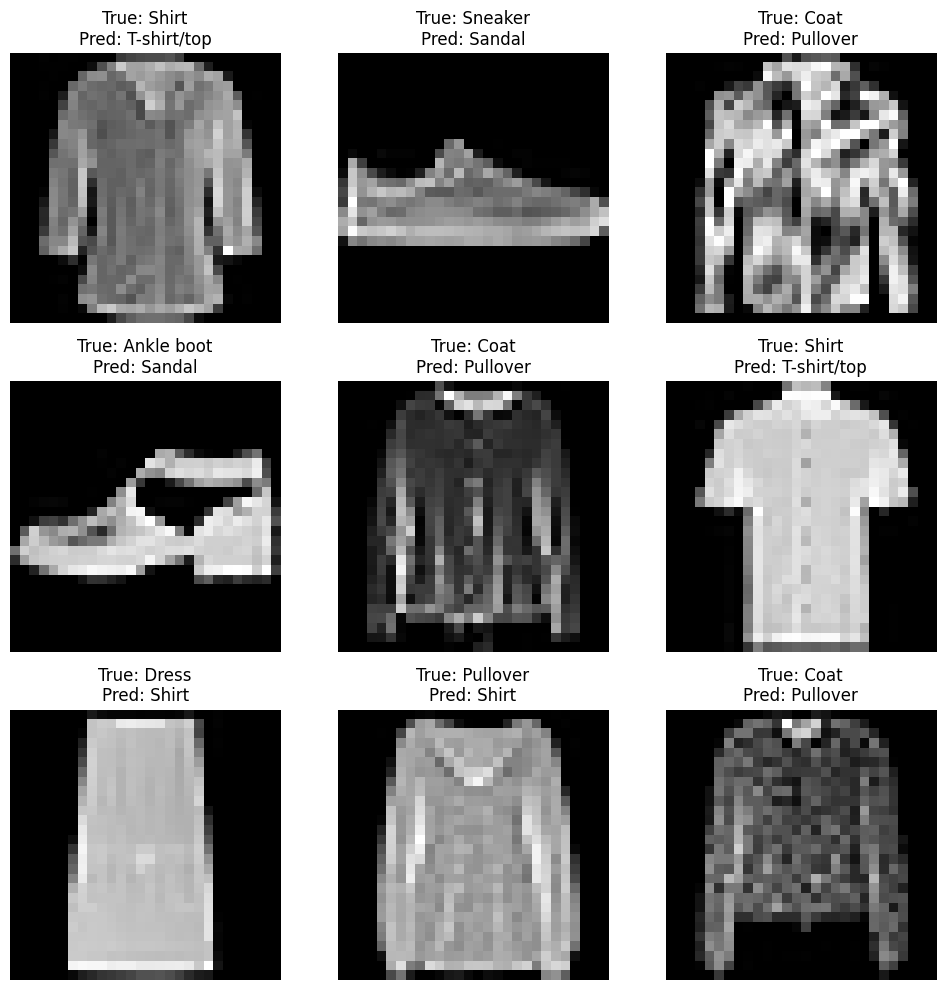

In [97]:
# Find misclassified images
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# Display a few misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:9]): # Display up to 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_labels[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🧩 Predict and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


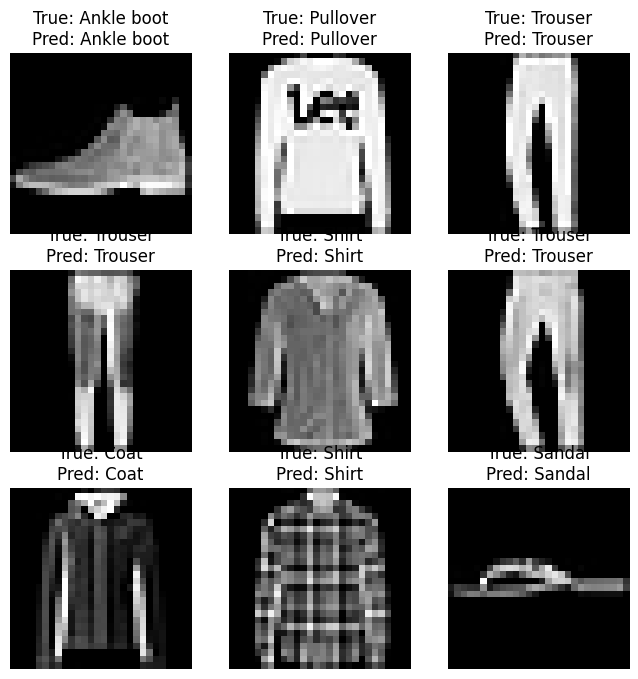

In [98]:

predictions = model.predict(test_images)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')  # 28×28 grayscale
    plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()
